# Medical Data Visualizer

This project is an assignment for a [freeCodeCamp Data Analysis with Python Certification](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer 'Medical Data Visualizer'). You are given medical examination **[data](https://raw.githubusercontent.com/fishenzone/portfolio/main/data/medical_examination.csv 'CSV file Medical Data')** in order visualize and make calculations from it using matplotlib, seaborn, and pandas.

***[Click here](https://replit.com/@Fishenzone/medical-data-visualizer#README.md 'Replit Medical Data Visualizer') to see the link to the data, as well as the full description of the coding challenge.*** 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./data/medical_examination.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


### Add 'overweight' column

Calculating overweight: 
 - Divide the weight in kilograms by the square of the height in meters 
 - If the value is > 25, it means that the person is overweight

**The column should be 0 for NON-overweight person and 1 for an overweight person**

In [2]:
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2) # BMI formula
df.loc[df['overweight'] <= 25, 'overweight'] = 0
df.loc[df['overweight'] > 25, 'overweight'] = 1
df['overweight']

0        0.0
1        1.0
2        0.0
3        1.0
4        0.0
        ... 
69995    1.0
69996    1.0
69997    1.0
69998    1.0
69999    0.0
Name: overweight, Length: 70000, dtype: float64

### Normalize

- Normalize data by making 0 always good and 1 always bad
- If the value of 'cholesterol' or 'gluc' is 1, make the value 0
- If the value is more than 1, make the value 1

In [3]:
df.loc[df["cholesterol"] == 1, "cholesterol"] = 0
df.loc[df["cholesterol"] > 1, "cholesterol"] = 1

df.loc[df["gluc"] ==1, "gluc"] = 0
df.loc[df["gluc"] > 1, "gluc"] = 1

df.loc[:, ['cholesterol', 'gluc']]

,cholesterol,gluc
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
69995,0,0
69996,1,1
69997,1,0
69998,0,1


In [4]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


### Create Categorical Plot

**Figure requirements:**
- Created by `sns.catplot()`
- Kind: bar
- Two plots: One for cardio = 0 and one for cardio = 1
- For each of above value of cardio use columns: 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight' with sum of their values 0 and 1 

In [5]:
df_cat = pd.melt(
    df, 
    id_vars = ['cardio'], 
    value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
)

df_cat = df_cat.groupby(['cardio','variable', 'value'])['value'].count().rename('total').reset_index()
df_cat

,cardio,variable,value,total
0,0,active,0.0,6378
1,0,active,1.0,28643
2,0,alco,0.0,33080
3,0,alco,1.0,1941
4,0,cholesterol,0.0,29330
5,0,cholesterol,1.0,5691
6,0,gluc,0.0,30894
7,0,gluc,1.0,4127
8,0,overweight,0.0,15915
9,0,overweight,1.0,19106


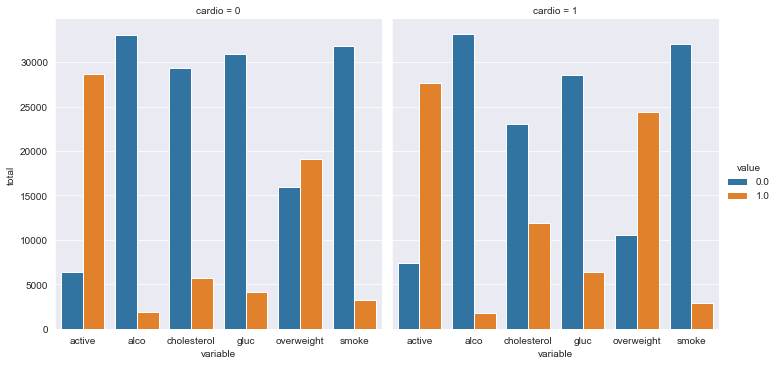

In [6]:
sns.set_style('darkgrid')
sns.catplot(
    data = df_cat,
    x = 'variable',
    y = 'total',
    hue = 'value', 
    col = 'cardio', 
    kind = 'bar'
)

plt.show()

### Clean the data

**Filter out the following patient segments that represent incorrect data:**
- Diastolic pressure('ap_lo') is higher than systolic('ap_hi')
- Height is less than the 2.5th percentile
- Height is more than the 97.5th percentile
- Weight is less than the 2.5th percentile
- Weight is more than the 97.5th percentile

### Create Correlation Heat Map Plot

**Requirements:**
 - Plot the correlation matrix using seaborn's `heatmap()`
 - Mask the upper triangle

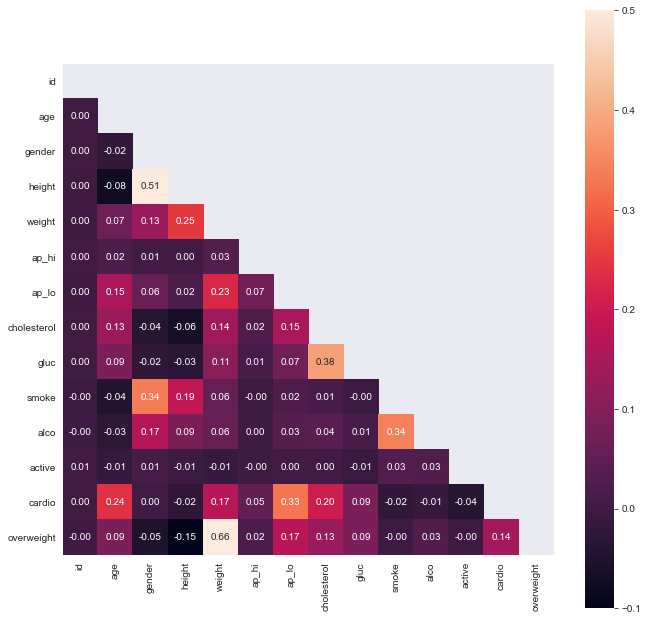

In [7]:
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]

corr = df_heat.corr()
mask = np.triu(np.ones_like(corr))

fig, ax = plt.subplots(figsize = (11, 11))
sns.heatmap(
    corr, 
    mask = mask,
    annot = True,
    fmt = '.2f',
    vmin = -0.1,
    vmax = 0.5,
    square = True
)

plt.show()